# House Prices: Advanced Regression Techniques

In [476]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Hide some annoying deprecation warnings
import warnings
def no_op(*_, **__):
    pass
warnings.warn = no_op

# Set some display defaults
pd.set_option('display.max_columns', 200)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [470]:
all_train_set = pd.read_csv('data/train.csv', index_col='Id')
all_test_set = pd.read_csv('data/test.csv', index_col='Id')

## Sale Price Distribution

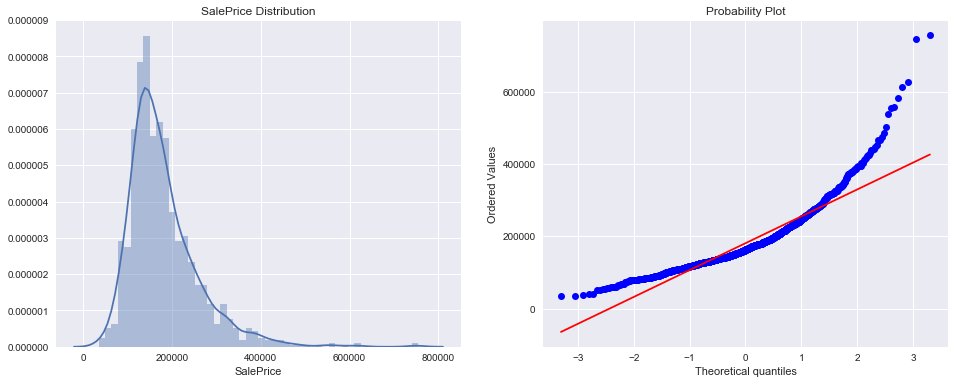

1.880940746034036

In [471]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(all_train_set['SalePrice'], bins=50)
plt.title('SalePrice Distribution')
plt.subplot(1,2,2)
stats.probplot(all_train_set['SalePrice'], plot=plt)
plt.show()
stats.skew(all_train_set['SalePrice'])

## Log Transformed Sale Price Distribution

In [472]:
all_train_set['LogSalePrice'] = np.log1p(all_train_set.SalePrice)

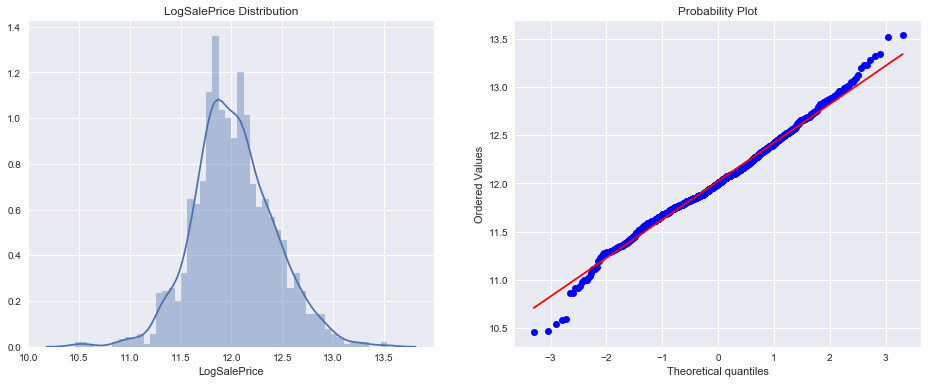

0.12122191311528359

In [473]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(all_train_set['LogSalePrice'], bins=50)
plt.title('LogSalePrice Distribution')
plt.subplot(1,2,2)
stats.probplot(all_train_set['LogSalePrice'], plot=plt)
plt.show()
stats.skew(all_train_set['LogSalePrice'])

## Features

In [474]:
all_train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220


### Feature Correlation

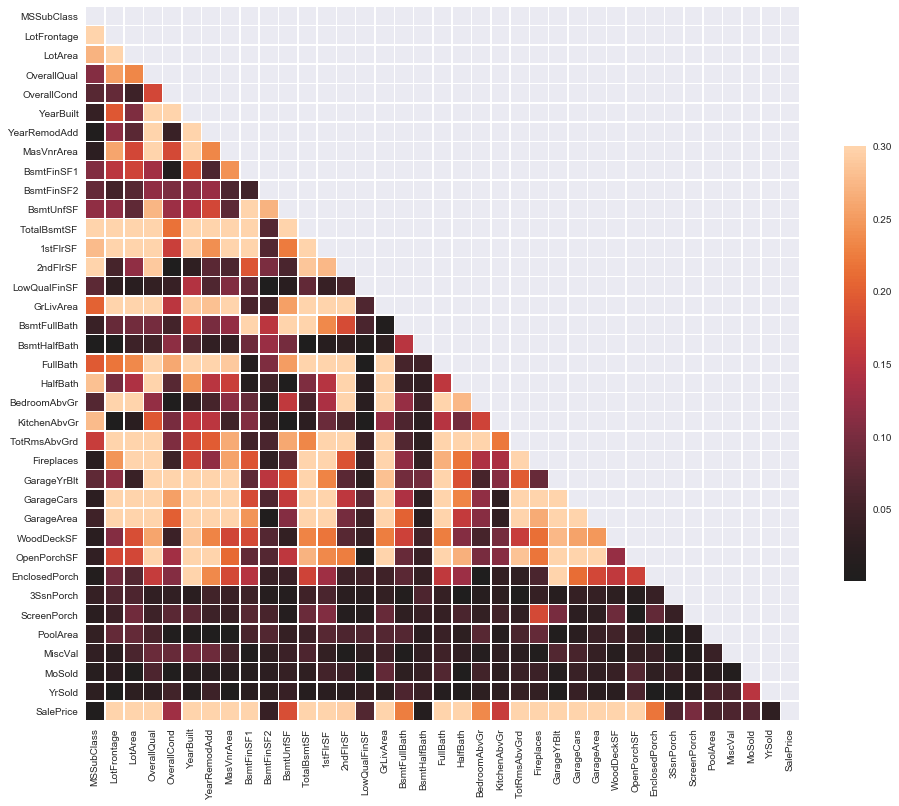

In [481]:
correlation = all_train_set.drop('LogSalePrice', axis=1).corr(method='spearman').abs()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(correlation, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [418]:
correlation['SalePrice'].drop(['SalePrice', 'LogSalePrice']).sort_values(ascending=False)

OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch    0.218394
BsmtUnfSF        0.185197
KitchenAbvGr     0.164826
OverallCond      0.129325
ScreenPorch      0.100070
MoSold           0.069432
LowQualFinSF     0.067719
3SsnPorch        0.065440
MiscVal          0.062727
PoolArea         0.058453
BsmtFinSF2       0.038806
YrSold           0.029899
BsmtHalfBath     0.012189
MSSubClass       0.007192
Name: SalePrice, dtype: float64

### Continuous

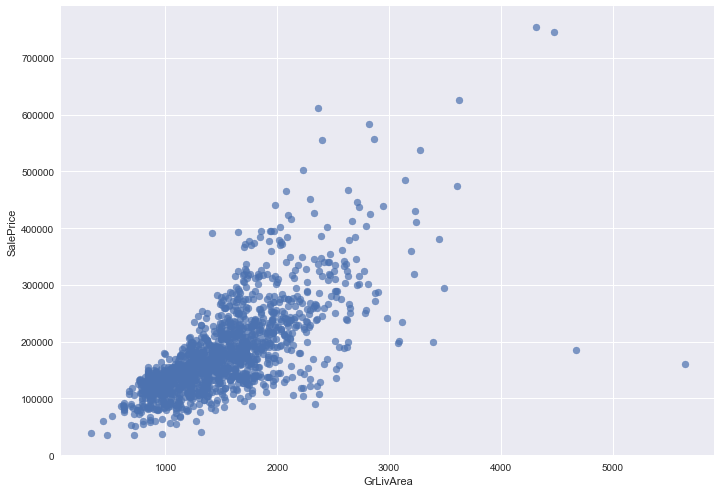

In [42]:
plt.scatter(data=all_train_set, x='GrLivArea', y='SalePrice', alpha=.7, )
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

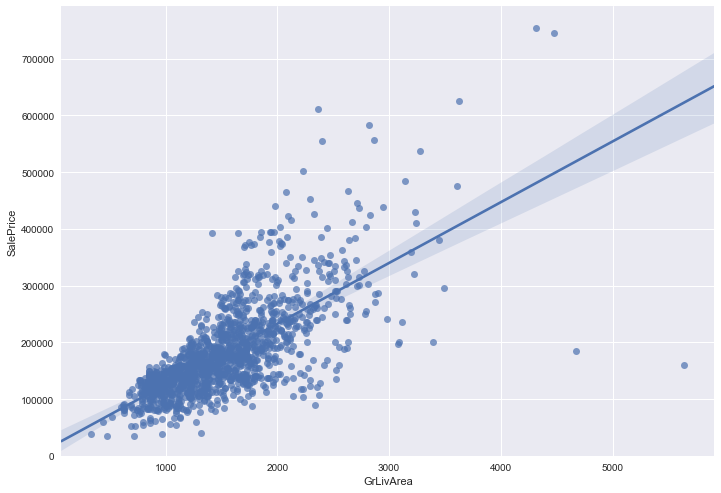

In [71]:
reg = sns.regplot(data=all_train_set, x='GrLivArea', y='SalePrice', scatter_kws={'alpha': .7})
reg.axes.set_ylim(0,)
plt.show()

### Discrete

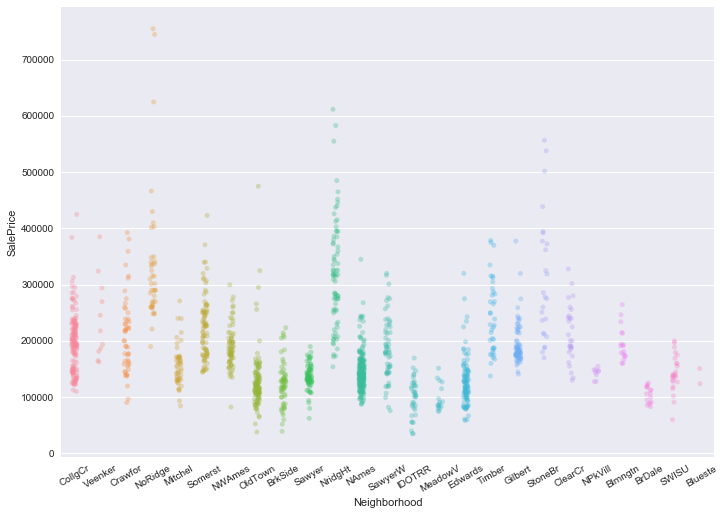

In [11]:
fig = sns.stripplot(data=all_train_set, x="Neighborhood", y="SalePrice", jitter=True, alpha=.33);
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
fig

## Dealing with Missing Data

In [86]:
len(all_train_set)

1460

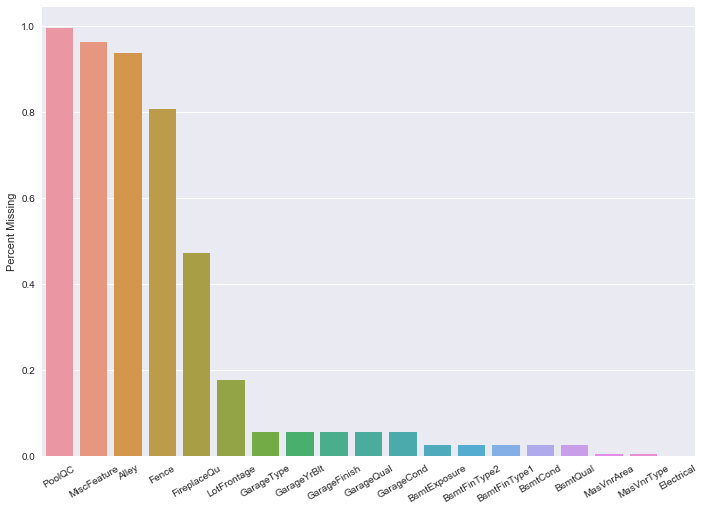

,Feature,Number Missing,Percent Missing
PoolQC,PoolQC,1453,0.995205
MiscFeature,MiscFeature,1406,0.963014
Alley,Alley,1369,0.937671
Fence,Fence,1179,0.807534
FireplaceQu,FireplaceQu,690,0.472603
LotFrontage,LotFrontage,259,0.177397
GarageType,GarageType,81,0.055479
GarageYrBlt,GarageYrBlt,81,0.055479
GarageFinish,GarageFinish,81,0.055479
GarageQual,GarageQual,81,0.055479


In [101]:
na_counts = all_train_set.isna().sum()
na_counts = na_counts[na_counts > 0]
missing_data = pd.DataFrame(index=na_counts.index, data={
    'Feature': na_counts.index,
    'Number Missing': na_counts,
    'Percent Missing': na_counts / len(all_train_set)
}).sort_values('Percent Missing', ascending=False)

fig = sns.barplot(data=missing_data.sort_values('Percent Missing', ascending=False),
                  x=missing_data.index,
                  y='Percent Missing')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
plt.show()

missing_data

In [484]:
continuous_features = [
    'LotArea',
    'YearBuilt',
    'YearRemodAdd',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'LotFrontage',
    'MasVnrArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal']

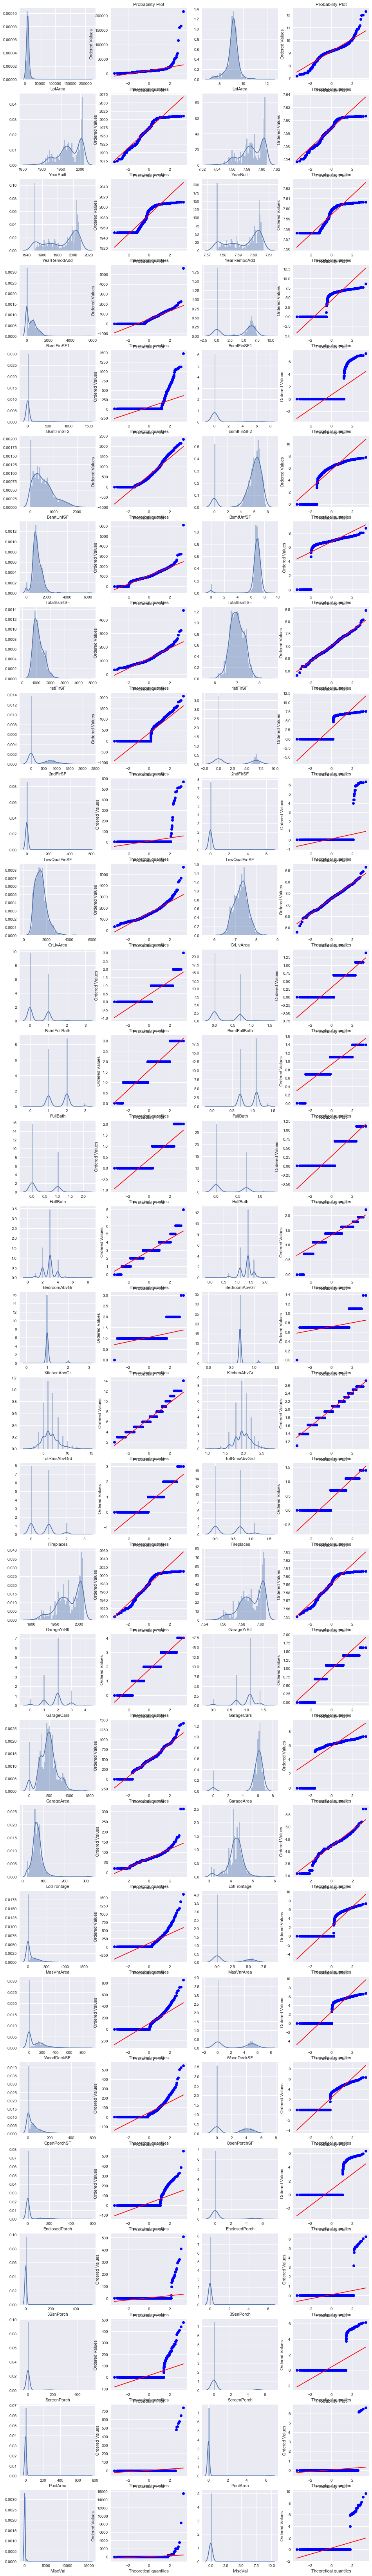

In [503]:
rows = len(continuous_features)
cols = 4
plt.figure(figsize=(4 * cols, 4 * rows))
for i, feature in enumerate(continuous_features):
    plt.subplot(rows, cols, i * 4 + 1)
    sns.distplot(all_train_set[feature].dropna(), bins=50)
    
    plt.subplot(rows, cols, i * 4 + 2)
    stats.probplot(all_train_set[feature].dropna(), plot=plt)
    
    plt.subplot(rows, cols, i * 4 + 3)
    sns.distplot(np.log1p(all_train_set[feature].dropna()), bins=50)
    
    plt.subplot(rows, cols, i * 4 + 4)
    stats.probplot(np.log1p(all_train_set[feature].dropna()), plot=plt)
plt.show()

## Validate a Model

In [14]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from collections import defaultdict

In [44]:
class YearAndMonthTransformer(TransformerMixin):
    def __init__(self, year='YrSold', month='MoSold'):
        self.year = year
        self.month = month
        
    def fit(self, X, y=None, **fit_params):
        min_year = X[self.year].min()
        min_month = X[self.month].min()
        self.base_months = min_year * 12 + min_month
        return self 
    
    def transform(self, X, **transform_params):
        months = X[self.month].tolist()
        years = X[self.year].tolist()
        combined = []
        for (year, month) in zip(years, months):
            combined.append(year * 12 + month - self.base_months)
            
        return np.asarray(combined).reshape(len(combined), 1)

In [65]:
class ColumnSelector(TransformerMixin):
    
    def __init__(self, columns=[]):
        self.columns = columns
        
    def fit(self, X, y, **fit_params):
        return self
        
    def transform(self, X, **transform_params):
        return X[self.columns]
    

class FillNaTransformer(TransformerMixin):
    
    def __init__(self, fill_with):
        self.fill_with = fill_with
        
    def fit(self, X, y, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        return X.fillna(self.fill_with)
    

class DebugTransformer(TransformerMixin):
    def fit(self, X, y):
        print("fit")
        print(X)
        print(y)
        return self
        
    def transform(self, X, y=None):
        print("transform")
        print(X)
        print(y) 
        return X
    
class ToDictTransformer(TransformerMixin):

    def fit(self, *_):
        return self

    def transform(self, X, **transform_params):
        return X.to_dict(orient='records')
    

def factor_feature(name):
    return (name, Pipeline([
        ('extract', ColumnSelector([name])),
        ('fill_na', FillNaTransformer('missing')),
        ('to_dict', ToDictTransformer()),
        ('label', DictVectorizer(sparse=False))
    ]))

def continuous_feature(name, default_value=0.0):
    return (name, Pipeline([
        ('extract', ColumnSelector([name])),
        ('fill_na', FillNaTransformer(default_value))
    ]))

In [373]:
regressors = [GradientBoostingRegressor(), Lasso(), ElasticNet(), Ridge()]
comparison = defaultdict(list)
comparison['truth'].extend(all_train_set['LogSalePrice'].data)

for regressor in regressors:
    regressor_name = regressor.__class__.__name__
    
    print('---', regressor_name, '----')
    
    model = Pipeline([
        ('features', FeatureUnion([
            ## Continuous
            continuous_feature('LotArea'),
            continuous_feature('YearBuilt'),
            continuous_feature('YearRemodAdd'),
            continuous_feature('BsmtFinSF1'),
            continuous_feature('BsmtFinSF2'),
            continuous_feature('BsmtUnfSF'),
            continuous_feature('TotalBsmtSF'),
            continuous_feature('1stFlrSF'),
            continuous_feature('2ndFlrSF'),
            continuous_feature('LowQualFinSF'),
            continuous_feature('GrLivArea'),
            continuous_feature('BsmtFullBath'),
            continuous_feature('FullBath'),
            continuous_feature('HalfBath'),
            continuous_feature('BedroomAbvGr'),
            continuous_feature('KitchenAbvGr'),
            continuous_feature('TotRmsAbvGrd'),
            continuous_feature('Fireplaces'),
            continuous_feature('GarageYrBlt'),
            continuous_feature('GarageCars'),
            continuous_feature('GarageArea'),
            continuous_feature('LotFrontage'),
            continuous_feature('MasVnrArea'),
            continuous_feature('WoodDeckSF'),
            continuous_feature('OpenPorchSF'),
            continuous_feature('EnclosedPorch'),
            continuous_feature('3SsnPorch'),
            continuous_feature('ScreenPorch'),
            continuous_feature('PoolArea'),
            continuous_feature('MiscVal'),

            ## Categorical
            factor_feature('MSSubClass'),
            factor_feature('MSZoning'),
            factor_feature('Street'),
            factor_feature('Alley'),
            factor_feature('LotShape'),
            factor_feature('LandContour'),
            factor_feature('Utilities'),
            factor_feature('LotConfig'),
            factor_feature('LandSlope'),
            factor_feature('Neighborhood'),
            factor_feature('Condition1'),
            factor_feature('Condition2'),
            factor_feature('BldgType'),
            factor_feature('HouseStyle'),
            factor_feature('OverallQual'),
            factor_feature('OverallCond'),
            factor_feature('RoofStyle'),
            factor_feature('RoofMatl'),
            factor_feature('Exterior1st'),
            factor_feature('Exterior2nd'),
            factor_feature('MasVnrType'),
            factor_feature('ExterQual'),
            factor_feature('ExterCond'),
            factor_feature('Foundation'),
            factor_feature('BsmtQual'),
            factor_feature('BsmtCond'),
            factor_feature('BsmtExposure'),
            factor_feature('BsmtFinType1'),
            factor_feature('Heating'),
            factor_feature('HeatingQC'),
            factor_feature('CentralAir'),
            factor_feature('Electrical'),
            factor_feature('KitchenQual'),
            factor_feature('Functional'),
            factor_feature('FireplaceQu'),
            factor_feature('GarageType'),
            factor_feature('GarageFinish'),
            factor_feature('GarageQual'),
            factor_feature('GarageCond'),
            factor_feature('PavedDrive'),
            factor_feature('PoolQC'),
            factor_feature('Fence'),
            factor_feature('MiscFeature'),
            factor_feature('SaleType'),
            factor_feature('SaleCondition'),

            ('YearAndMonth', YearAndMonthTransformer())

        ])),
        ('regressor', regressor)
    ])

    np.random.seed(0)
    kfold = KFold(5)
    rmses = []

    for (train_idx, cv_idx) in kfold.split(all_train_set):
        train = all_train_set.iloc[train_idx]
        validate = all_train_set.iloc[cv_idx]

        train_X = train
        train_y = train['LogSalePrice']

        validate_X = validate
        validate_y = validate['LogSalePrice']

        model.fit(train_X, y=train_y)
        predictions = model.predict(validate_X)
        rmse = np.sqrt(mean_squared_error(validate_y, predictions))
        rmses.append(rmse)
        print(rmse)

        comparison[regressor_name].extend(predictions)

    print('mean', np.mean(rmses), '\n')

--- GradientBoostingRegressor ----
0.11410547818801654
0.14178493086300373
0.13184056809517702
0.11394519460839743
0.12835875066807503
mean 0.12600698448453396 

--- Lasso ----
0.16263382220595285
0.2013902012031313
0.17430721046444994
0.18101004252333122
0.2625894716689662
mean 0.1963861496131663 

--- ElasticNet ----
0.15688375253572281
0.19517741350691833
0.16400427346088908
0.17162309806145457
0.25418877058032596
mean 0.18837546162906216 

--- Ridge ----
0.11981266789699409
0.15433342819640294
0.14110861608585146
0.11628648450990282
0.18537272103649413
mean 0.1433827835451291 



In [177]:
df = pd.DataFrame(columns=['order', 'value', 'source'])
sorted_indices = np.argsort(comparison['truth'])

for (name, preds) in comparison.items():
    df = df.append([
        dict(order=i, value=p, source=name)
        for (i, p) in enumerate(np.asarray(preds)[sorted_indices])])

In [196]:
df['Truth'] = df['source'] == 'truth'

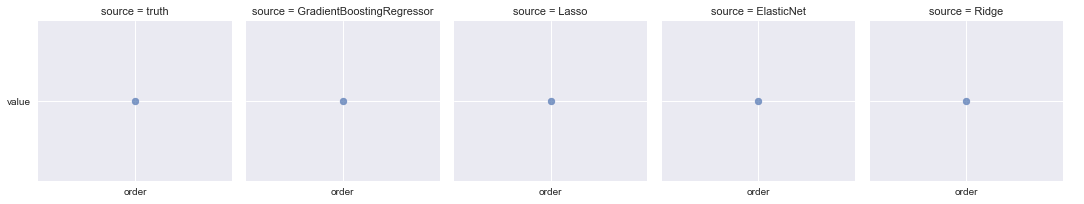

In [393]:
g = sns.FacetGrid(df, col='source')
g.map(plot.scatter, x='order', y='value', alpha=.7)
g.add_legend();

In [178]:
df.source.unique()

array(['truth', 'GradientBoostingRegressor', 'Lasso', 'ElasticNet',
       'Ridge'], dtype=object)

## Make a Submission

In [400]:
model.fit(all_train_set, y=all_train_set['SalePrice'])
predictions = model.predict(all_test_set)
predictions = np.expm1(predictions)

/Users/zstewart/ml-group/House-Prices/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


In [483]:
assert pd.isna(predictions).sum() == 0, \
    'There are some NaN predictions!'

In [384]:
submission = pd.DataFrame(index=all_test_set.index, data={'SalePrice': predictions})

In [386]:
submission.to_csv('submission.csv')